pip install qiskit[visualization], add graph visualization

pip install qiskit-ibm-runtime , this is for actual quantum hardware support

Bell State, proving quantum entanglement

q0 is in superposition of 0 or 1 (using hadamard gate), if i measure q0 then q1 also collapses at a state due to CNOT (cx) gate

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram

from qiskit_aer import Aer, AerSimulator

Prepare basic Simulators

In [2]:
sim_qasm = Aer.get_backend('qasm_simulator') # Preferrably using AerSimulators
sim_aer = AerSimulator()

Prepare Quantum Circuit

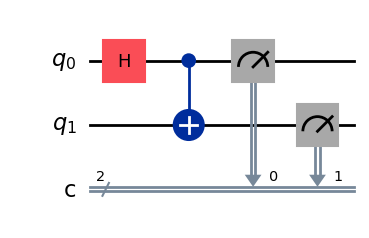

In [3]:
# Step 1: Create a quantum circuit with 2 qubits & 2 classical bits from measurement
qc = QuantumCircuit(2, 2)

# Step 2: Apply Hadamard to qubit 0
qc.h(0)
# Step 3: Apply CNOT (control=0, target=1)
# qc.x(1) this is to flip q1 before cx
qc.cx(0, 1)

# Step 4: Measure both qubits
qc.measure([0, 1], [0, 1])

# Print the circuit diagram
qc.draw('mpl')

QASM Simulator

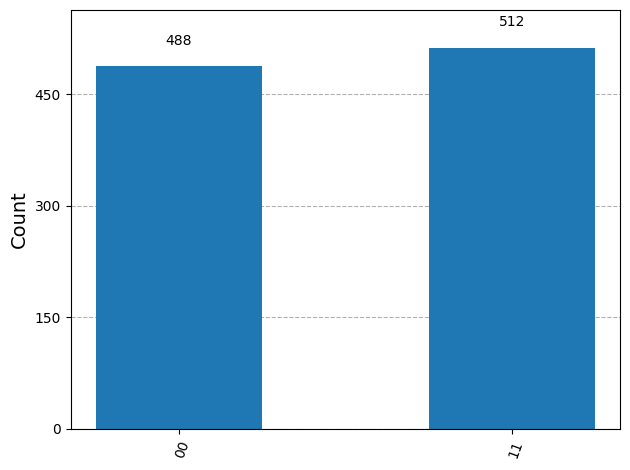

In [4]:
# Transpile the circuit for the backend
compiled_qc = transpile(qc, sim_qasm)

job = sim_qasm.run(compiled_qc, shots=1000)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)

Aer Simulator

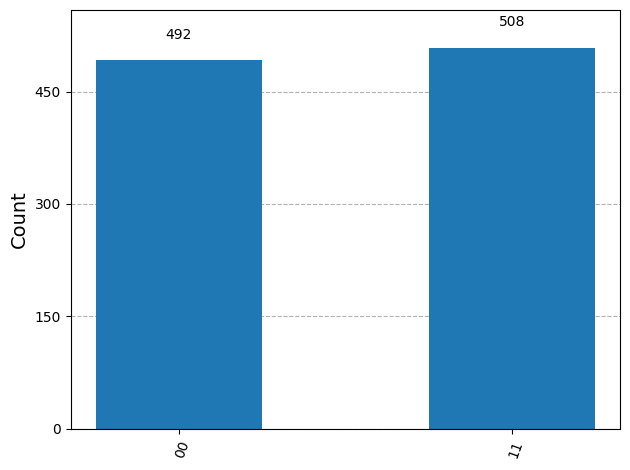

In [5]:
# Transpile the circuit for the backend
compiled_qc = transpile(qc, sim_aer)

job = sim_aer.run(compiled_qc, shots=1000)

result = job.result()

counts = result.get_counts()

plot_histogram(counts)

Adding noise to AerSimulator

In [6]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

# Create a NoiseModel
noise_obj = NoiseModel()

# Add depolarizing error to single-qubit gates
error = depolarizing_error(param=0.05, num_qubits=1)
noise_obj.add_all_qubit_quantum_error(error, ['h']) 

Prepare Fake Manila simulator, won't require noise models

In [7]:
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
sim_manila = FakeManilaV2()

Transpile with 'sim_noisy' or 'sim_manila' to view different results of bell states

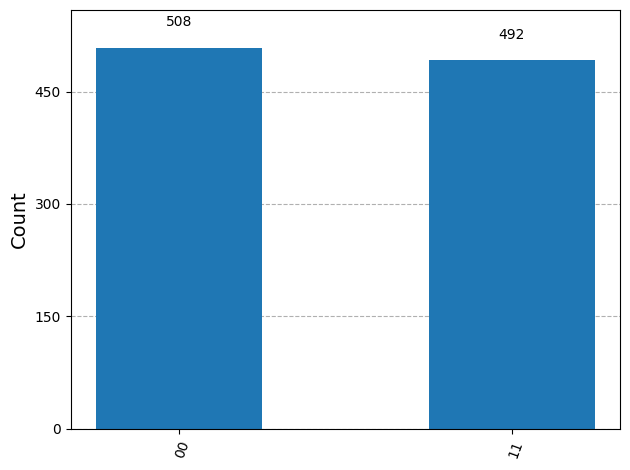

In [8]:
# Add noise model to AerSimulator
sim_noisy = AerSimulator(noise_model=noise_obj)

# Transpile with 'sim_noisy'
compiled_qc = transpile(qc, sim_noisy)

job_result = sim_noisy.run(compiled_qc, shots=1000).result()

plot_histogram(job_result.get_counts())


sim_manila results for comparision

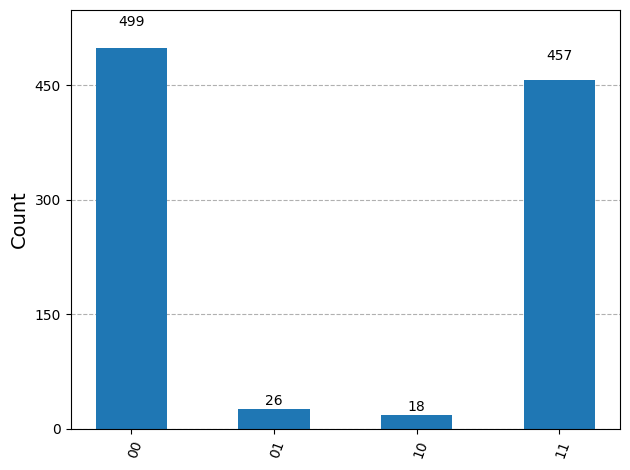

In [9]:
# Transpile with 'sim_manila'
compiled_qc = transpile(qc, sim_manila)

job_result = sim_manila.run(compiled_qc, shots=1000).result()

plot_histogram(job_result.get_counts())